# Hill Climbing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Single state, contains position and cost

In [2]:
class State:
    def __init__(self) -> None:
        self.position = []
        self.cost = 0

    def __repr__(self) -> str:
        return f'Node(position={self.position}, cost={self.cost})'

## Make a plot for iteration vs cost

In [3]:
def make_plot(costs):
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  ax.set_ylabel('Value of A.cost')
  ax.set_xlabel('Iteration #')
  ax.plot(costs)

## Objective function

In [4]:
def objective(X, func_no):
    if func_no == 1:
        return 10 * -np.cos(2 * (X[0] ** 2+X[1] ** 2) ** 0.5) * \
                        np.exp(-0.5 * ((X[0]+1) ** 2+(X[1]-1) ** 2) ** 0.5) + 5.1
    if func_no == 2:
        return -1*(0.2 + X[0]**2 + X[1]**2 - 0.1*np.cos(6*np.pi*X[0]) - 0.1*np.cos(6*np.pi*X[1]) )
    if func_no == 3:
        return -1 * (X[0]**2 + X[1]**2)

## Defining the neighbour funtion

In [5]:
def find_neighbours(A, step_size, ub, lb, func_no):
    neighbours = []
    n_variables = len(A.position)

    for i in range(n_variables):

        B = State()
        B.position = A.position.copy()
        B.position[i] = min(ub[i], B.position[i] + step_size) 
        B.cost = objective(B.position, func_no)
        neighbours.append(B)

        B = State()
        B.position = A.position.copy()
        B.position[i] = max(lb[i], B.position[i] - step_size)
        B.cost = objective(B.position, func_no)
        neighbours.append(B)
        
    return neighbours

## Hill climbing funtion

In [6]:
def find_optimum(A, step_size, ub, lb, func_no):

    costs = []

    opti_found = False
    while not opti_found:
        neighbours = find_neighbours(A, step_size, ub, lb, func_no)
        costs.append(A.cost)
        
        impr = False
        for B in neighbours:
            if B.cost > A.cost:
                A.position = B.position.copy();
                A.cost = B.cost;
                impr = True

        if not impr:
            opti_found = True
    
    make_plot(costs)
    return A

## [Equation 1](https://www.wolframalpha.com/input/?i=maximize+10+*+-cos%282+*+%28x+%5E+2%2By+%5E+2%29+%5E+0.5%29+*+exp%28-0.5+*+%28%28x%2B1%29+%5E+2%2B%28y-1%29+%5E+2%29+%5E+0.5%29+%2B+5.1+where+-2%3Cx%3C2+and+-2%3Cy%3C2)

![](https://i.imgur.com/sj1HS7N.png)

Node(position=[-1.024  1.024], cost=14.637448685992302)

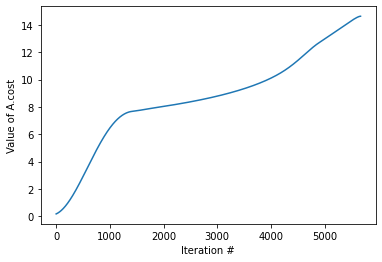

In [7]:
A = State()
func_no = 1
A.position = np.array([0, 0], dtype=float)
A.cost = objective(A.position, func_no)
step_size = 0.001
ub = np.array([2, 2], dtype=float)
lb = np.array([-2, -2], dtype=float)

find_optimum(A, step_size, ub, lb, func_no)

## [Equation 2](https://www.wolframalpha.com/input/?i=maximize+-1*%280.2+%2B+x%5E2+%2B+y%5E2+-+0.1*cos%286*pi*x%29+-+0.1*cos%286*pi*y%29+%29+where+-2%3Cx%3C2+and+-2%3Cy%3C2)

![](https://i.imgur.com/iB6SPl4.png)

Node(position=[0.926 0.926], cost=-1.8799473882049438)

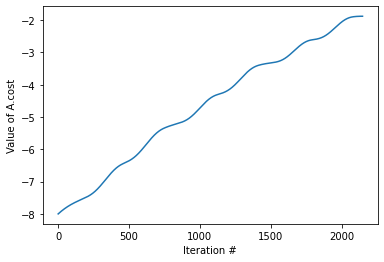

In [8]:
A = State()
func_no = 2
A.position = np.array([2, 2], dtype=float)
A.cost = objective(A.position, func_no)
step_size = 0.001
ub = np.array([2, 2], dtype=float)
lb = np.array([-2, -2], dtype=float)

find_optimum(A, step_size, ub, lb, func_no)

## [Equation 3](https://www.wolframalpha.com/input/?i=maximize+-1+*+%28x%5E2+%2B+y%5E2%29+where+-2%3Cx%3C2+and+-2%3Cy%3C2)

![](https://i.imgur.com/3nvFB0i.png)

Node(position=[-1.64104841e-15 -1.64104841e-15], cost=-5.3860797565976486e-30)

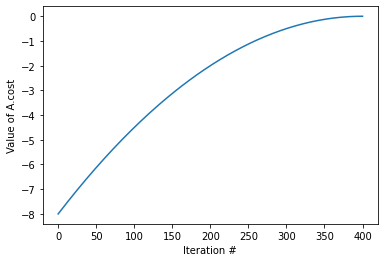

In [9]:
A = State()
func_no = 3
A.position = np.array([2, 2], dtype=float)
A.cost = objective(A.position, func_no)
step_size = 0.01
ub = np.array([2, 2], dtype=float)
lb = np.array([-2, -2], dtype=float)

find_optimum(A, step_size, ub, lb, func_no)